In [11]:
import pandas as pd
df = pd.read_csv("/content/Tesla.csv - Tesla.csv.csv")

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [13]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


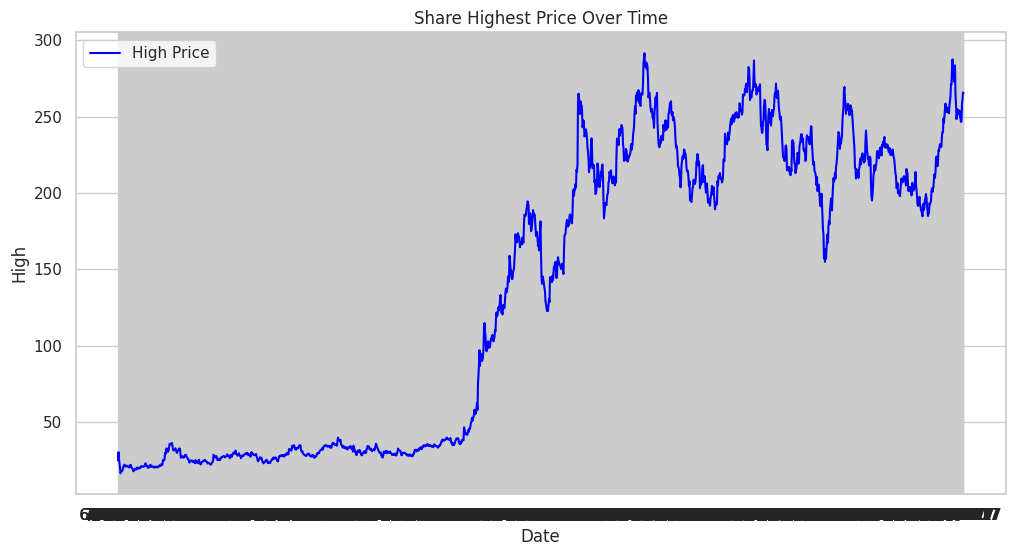

In [4]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='High', label='High Price', color='blue')
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Share Highest Price Over Time')
plt.show()

In [5]:
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [6]:
df = df.set_index('Date')

<Figure size 1200x600 with 0 Axes>

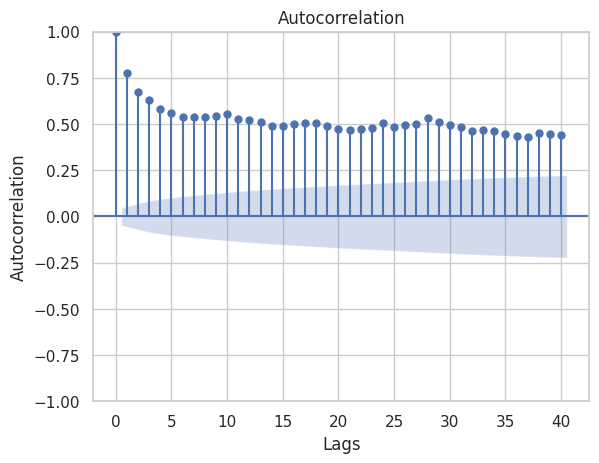

In [7]:
plt.figure(figsize=(12,6))
plot_acf(df['Volume'],lags = 40)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

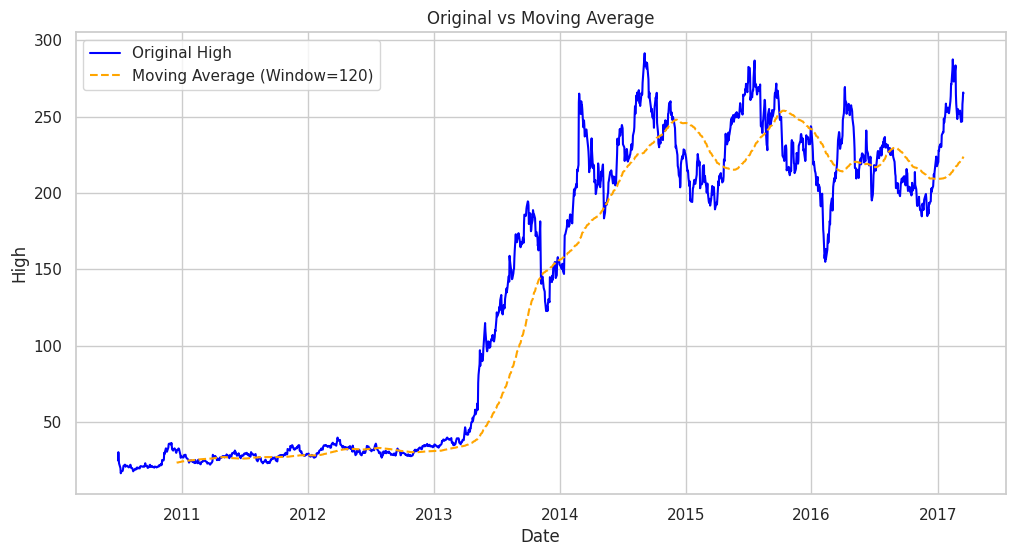

In [8]:
window_size = 120
df['high_smoothed'] = df['High'].rolling(window=window_size).mean()
plt.figure(figsize=(12, 6))

plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()

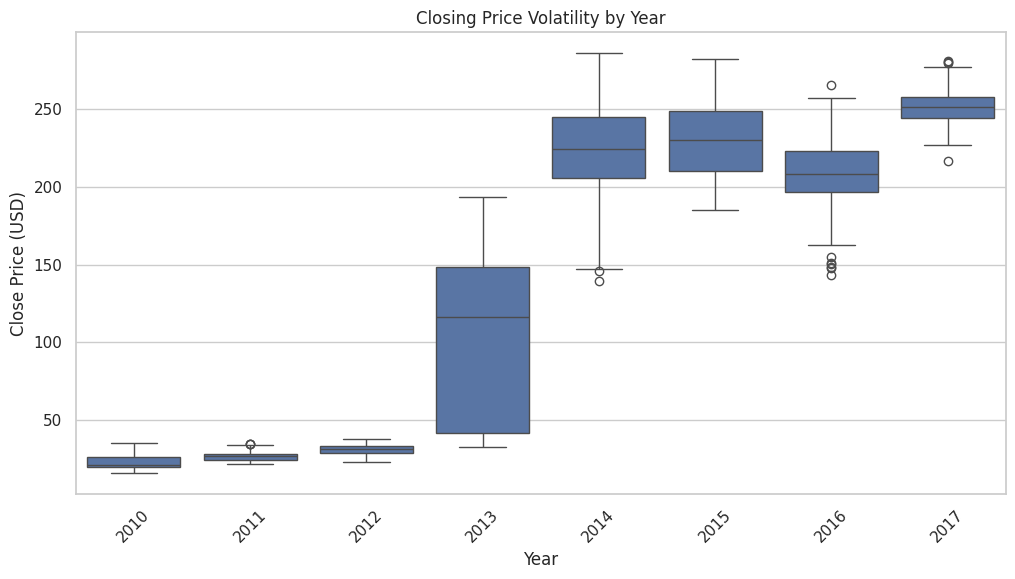

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Close', data=df)
plt.title('Closing Price Volatility by Year')
plt.xlabel('Year')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.show()

In [10]:
print(df.columns)


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'high_smoothed'], dtype='object')


            Open      High       Low     Close    Volume
Open    1.000000  0.999623  0.999605  0.999233  0.407515
High    0.999623  1.000000  0.999521  0.999691  0.416466
Low     0.999605  0.999521  1.000000  0.999656  0.397615
Close   0.999233  0.999691  0.999656  1.000000  0.406907
Volume  0.407515  0.416466  0.397615  0.406907  1.000000


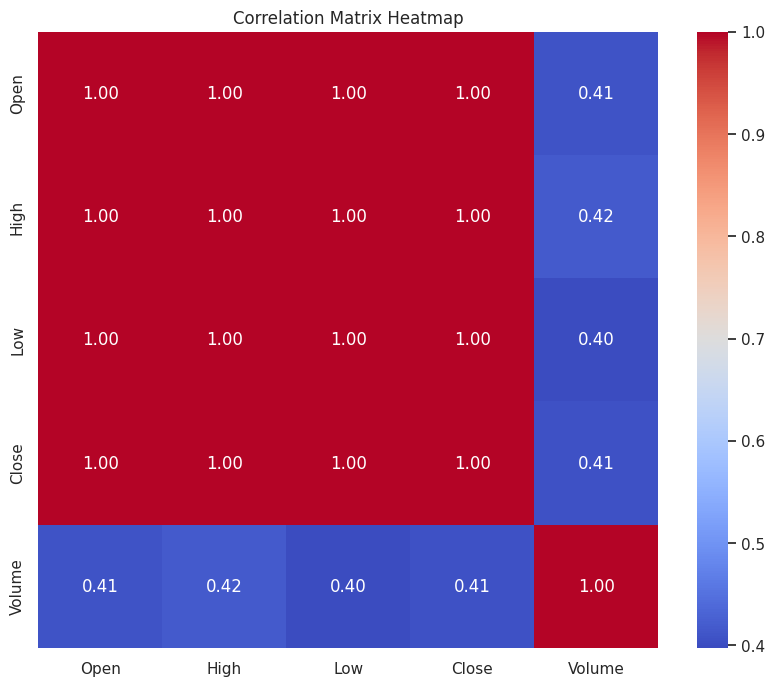

In [15]:
correlation_matrix=df[['Open','High','Low','Close','Volume']].corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

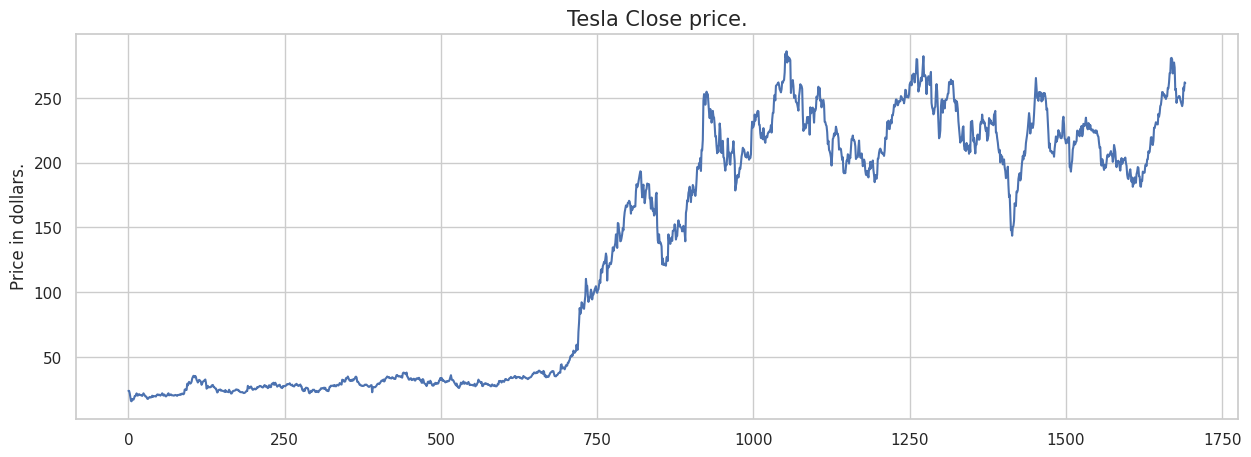

In [16]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()